### Visualize

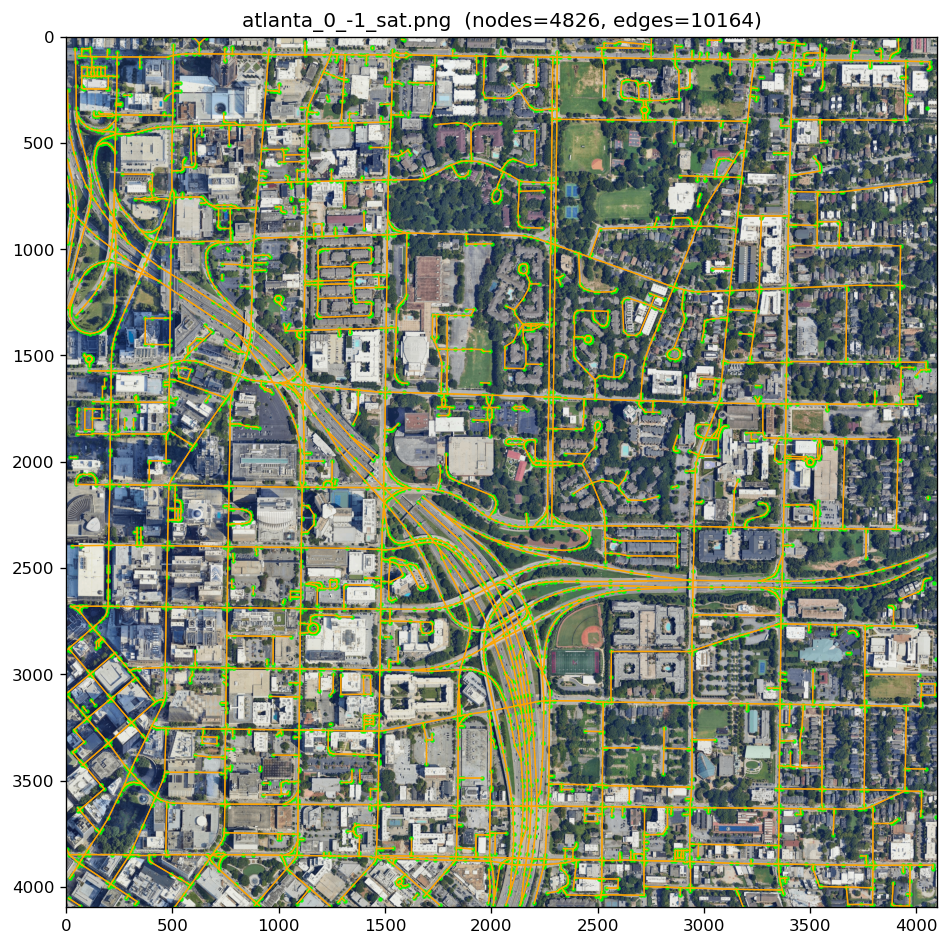

In [ ]:
# Credit: ChatGPT
import json
from PIL import Image
import matplotlib.pyplot as plt

def visualize_gt(gt_path, node_size=3, edge_lw=0.8,
                 edge_color="orange", node_color="lime"):
    with open(gt_path, "r") as f:
        gt = json.load(f)

    img = Image.open(gt["image_path"])
    img = img.transpose(Image.FLIP_TOP_BOTTOM)

    W = H = gt["tile_size"]
    fig, ax = plt.subplots(figsize=(8, 8), dpi=120)
    ax.imshow(img, extent=[0, W, 0, H], origin="upper")

    # Build local index -> (x,y)
    pos = {n["idx"]: (n["x"], n["y"]) for n in gt["nodes"]}

    # Edges
    for e in gt["edges"]:
        (x1, y1) = pos[e["src_idx"]]
        (x2, y2) = pos[e["dst_idx"]]
        ax.plot([x1, x2], [y1, y2], color=edge_color, lw=edge_lw, alpha=0.9)

    # Nodes
    xs, ys = zip(*pos.values()) if pos else ([], [])
    if xs:
        ax.scatter(xs, ys, s=node_size, color=node_color, alpha=0.8)

    ax.set_xlim(0, W)
    ax.set_ylim(H, 0) 
    ax.set_aspect("equal")
    ax.set_title(f"{gt['image_path'].split('/')[-1]}  "
                 f"(nodes={gt['num_nodes']}, edges={gt['num_edges']})")
    plt.tight_layout()
    plt.show()

# Example
visualize_gt("data/labels/atlanta_0_-1_graph.json")
